In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#### Load fearues and labels

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
(X_train,X_test)=(X_train.reshape(-1,28*28),X_test.reshape(-1,28*28))

In [5]:
print(f'x_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (60000, 784)
y_train shape: (60000,)


#### Apply standardization on features for fast computation

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [7]:
X_test=scaler.transform(X_test)

In [8]:
print("X Train: ",X_train.shape)
print("y Train: ",y_train.shape)
print("X Test: ",X_test.shape)
print("y Test: ",y_test.shape)

X Train:  (60000, 784)
y Train:  (60000,)
X Test:  (10000, 784)
y Test:  (10000,)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


#### Define Neural Model 

In [10]:
model = Sequential([
    Dense(400, input_dim=X_train.shape[1],activation='relu'),
    Dropout(0.1),
    Dense(250,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
])

C:\Users\1hasa\Envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         100,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 416,760 (1.59 MB)

 Trainable params: 416,760 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 


In [13]:
model.fit(X_train,y_train,batch_size=48,epochs=40,validation_split=0.2)

Epoch 1/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8760 - loss: 0.4095 - val_accuracy: 0.9623 - val_loss: 0.1347
Epoch 2/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9658 - loss: 0.1156 - val_accuracy: 0.9657 - val_loss: 0.1182
Epoch 3/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9751 - loss: 0.0820 - val_accuracy: 0.9682 - val_loss: 0.1247
Epoch 4/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9791 - loss: 0.0658 - val_accuracy: 0.9692 - val_loss: 0.1248
Epoch 5/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9820 - loss: 0.0556 - val_accuracy: 0.9697 - val_loss: 0.1400
Epoch 6/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9700 - val_loss: 0.1347
Epoch 7/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9729 - val_loss: 0.1292
Epoch 8/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9856 - loss: 0.0524 - 

### Model Evaluations

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.4924
Accuracy: 0.9764999747276306


In [15]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
y_pred.shape

(10000, 10)

In [17]:
y_pred=np.argmax(y_pred,axis=1)


In [18]:
y_pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [19]:
y_test[:5].reshape(1,-1)

array([[7, 2, 1, 0, 4]], dtype=uint8)



Classification Score               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



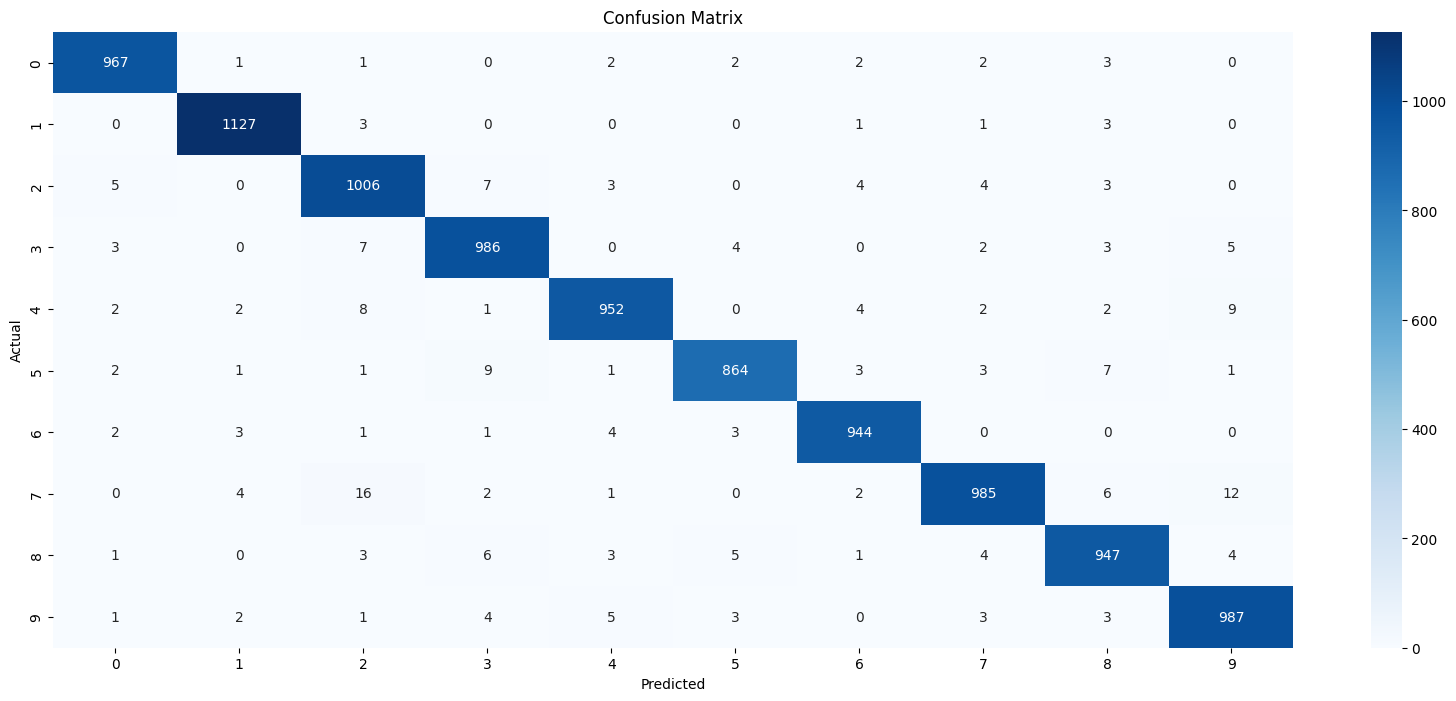

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
class_score=classification_report(y_test, y_pred)

print("\n\nClassification Score",class_score)

plt.figure(figsize=(20, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3','4','5','6','7','8','9'], yticklabels=['0', '1', '2','3','4','5','6','7','8','9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

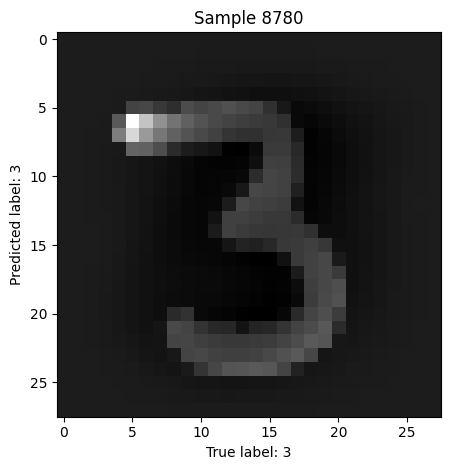

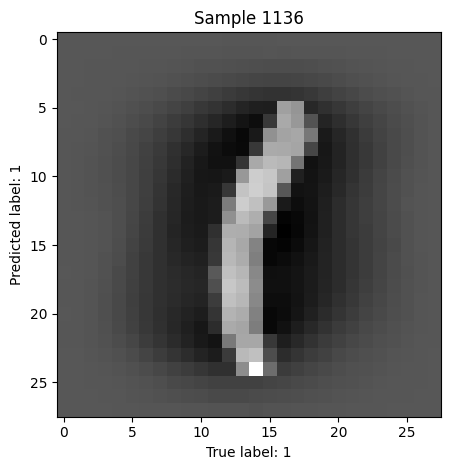

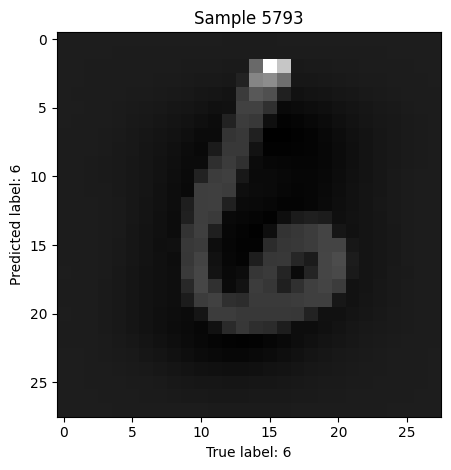

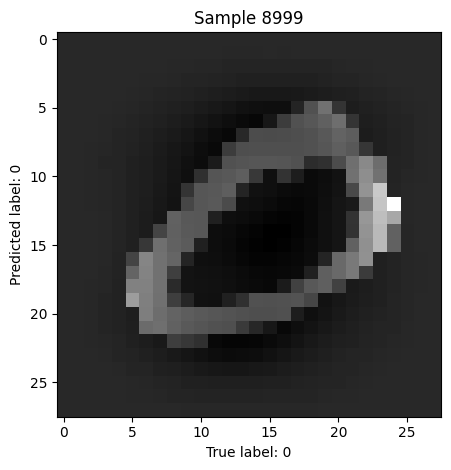

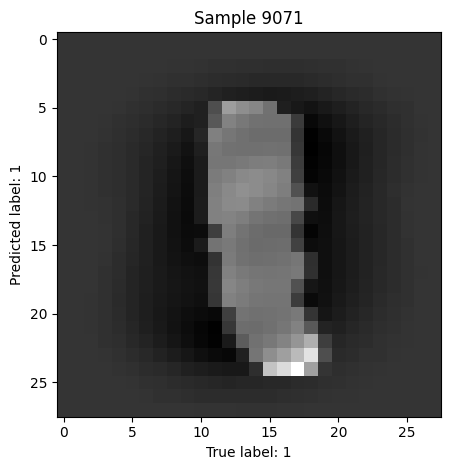

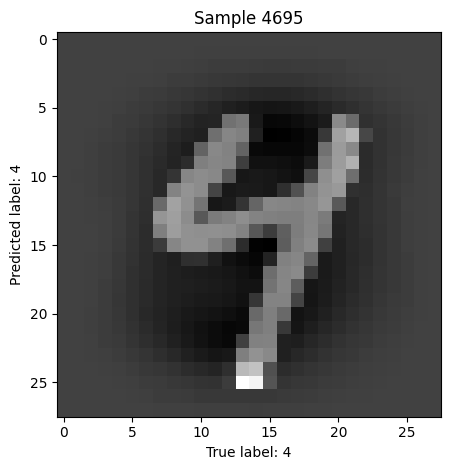

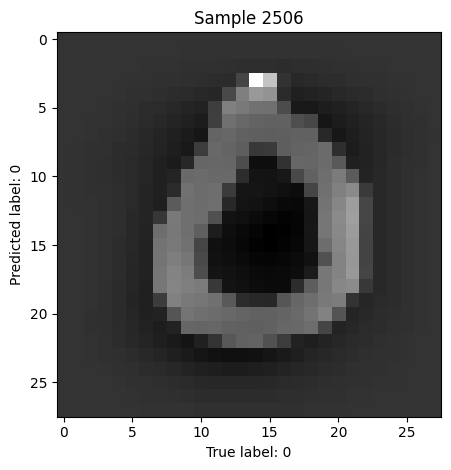

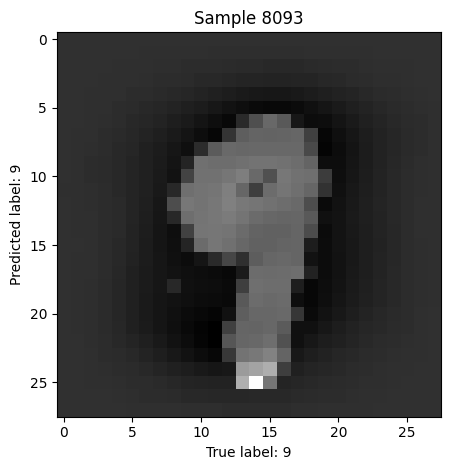

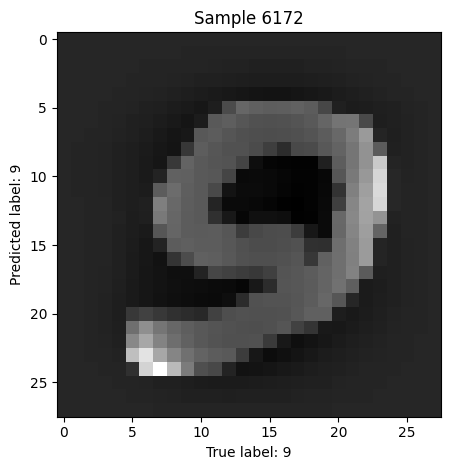

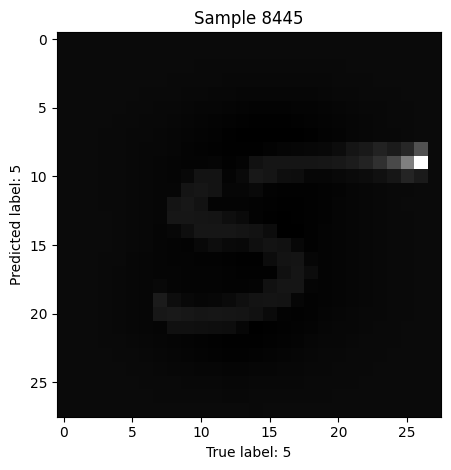

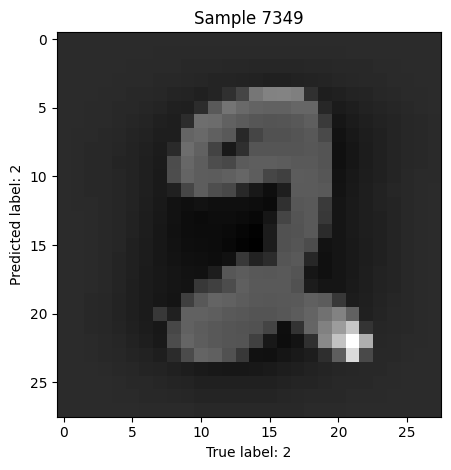

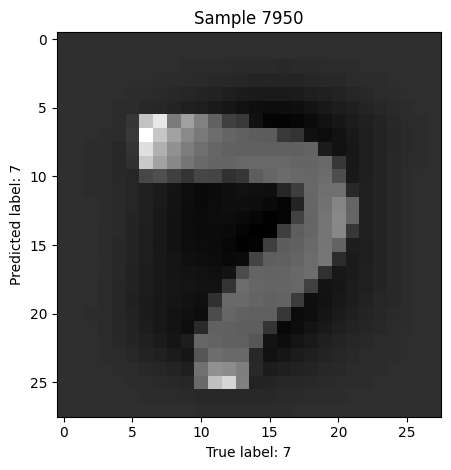

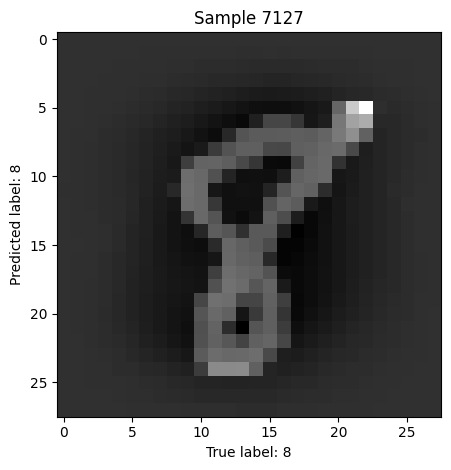

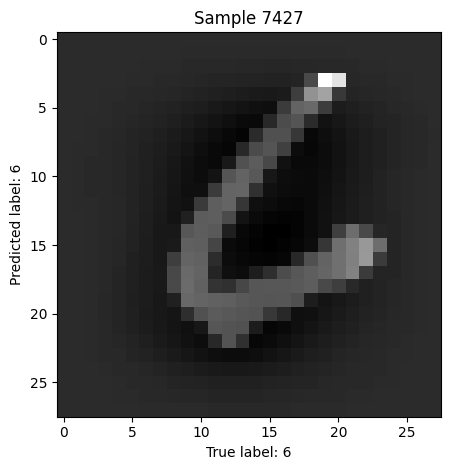

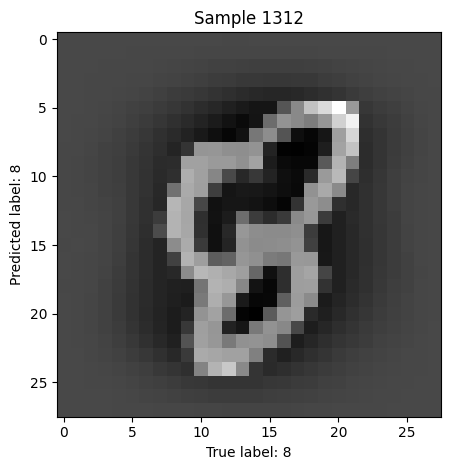

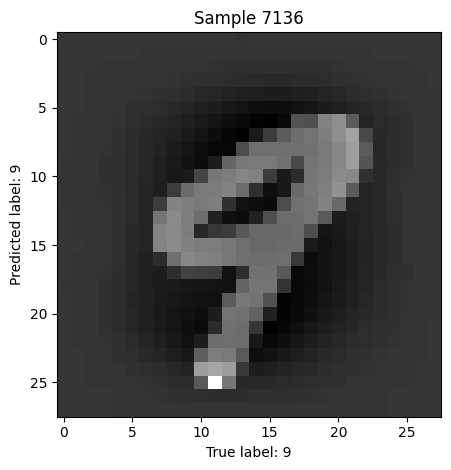

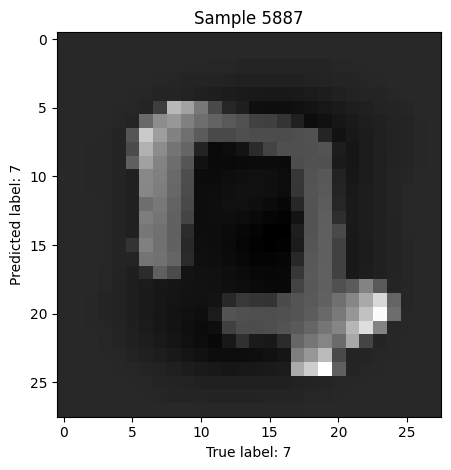

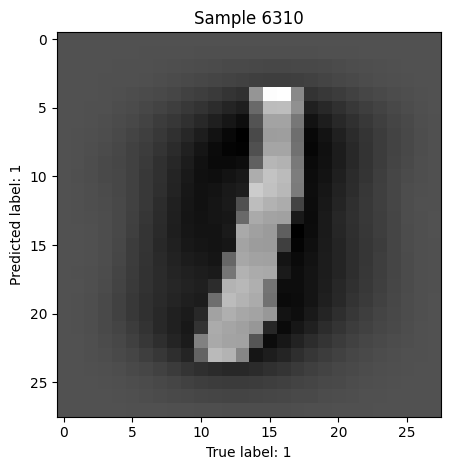

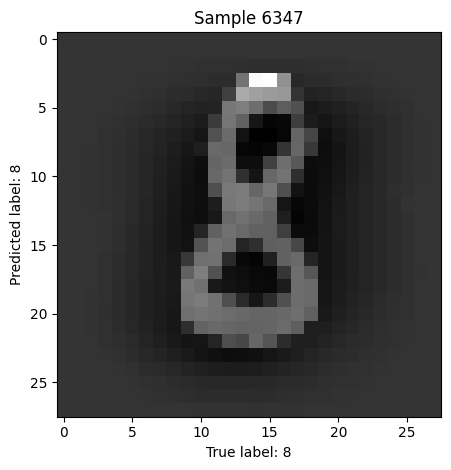

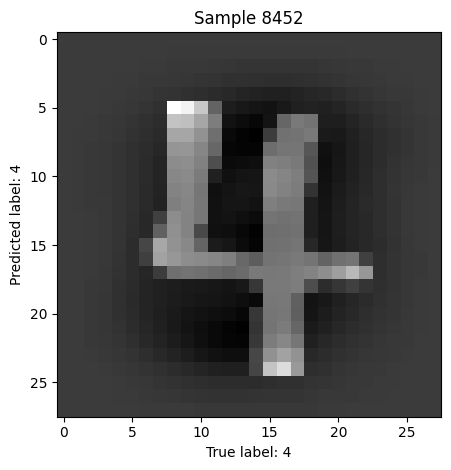

In [25]:
for i in range(20):
    index=np.random.randint(0, X_test.shape[0])
    true_label=y_test[index]
    pred_label=y_pred[index]
    plt.imshow(X_test[index].reshape((28,28)),cmap='gray')
    plt.xlabel(f'True label: {true_label}')
    plt.ylabel(f'Predicted label: {pred_label}')
    plt.title(f'Sample {index}')
    plt.tight_layout()
    plt.show()